In [2]:
import cv2
import skfmm
import numpy as np
import matplotlib.pyplot as plt
from deep_shadow import *
from utils import *

In [17]:
train_dataset, test_dataset = get_train_test(
    'data/heights_new/', 'data/shadows/', ['nyc'], ['summer'], 16, 20, 1)

In [18]:
sample_img = next(iter(train_dataset))
img = sample_img[0][0, :, :, 0]

In [41]:
# img = cv2.imread('data/heights_new/tok/16/58195/25797.png')
# img = img[:, :, 0]

In [19]:
phi = tf.where(img == -1.0, 0.0, -1.0) + 0.5
#  Compute signed distance
w = skfmm.distance(phi, dx = 1)
w = tf.where(w < 0, 0, w)
# w = w / np.max(w) # normalize between 0 and 1
# not normalizing because some tiles may have larger distance to buidings

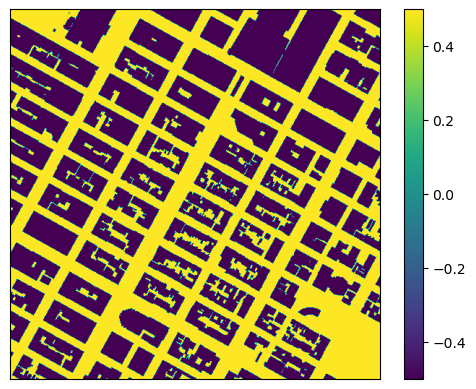

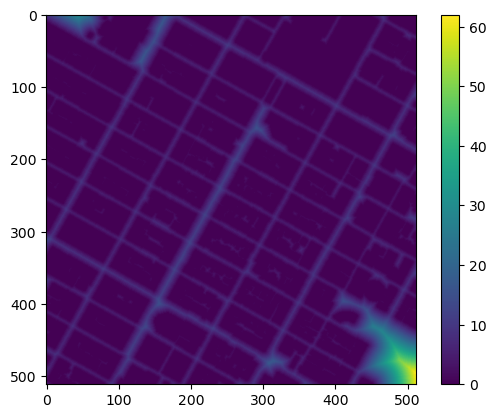

In [20]:
plt.imshow(phi)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

plt.imshow(w)
plt.colorbar()
plt.show()

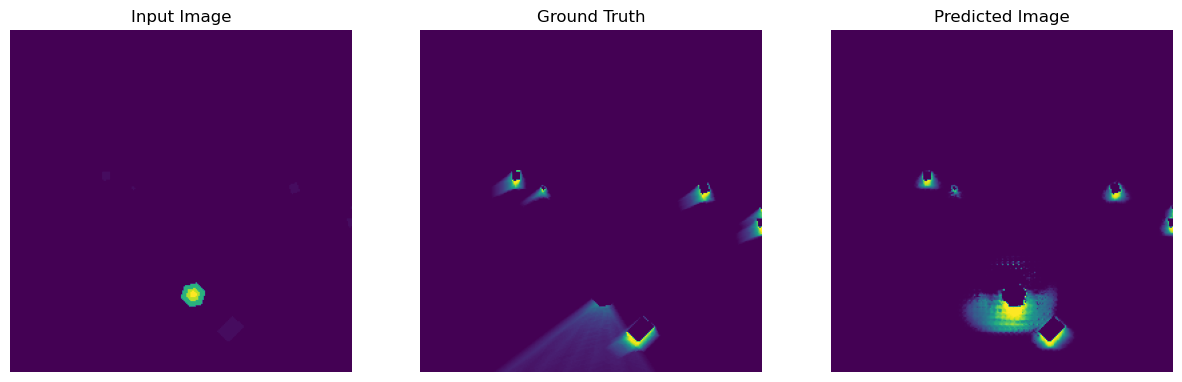

In [3]:
down_stack, up_stack = get_generator_arch('resnet9', attn = True)
deep_shadow = DeepShadow(512, 512, down_stack, up_stack, latitude=True, date=True, loss_funcs=[l1_loss], type='resnet9', attention=True, model_name='uniform_cities_resnet_attn__l1')
deep_shadow.restore('training_checkpoints_new/uniform_cities_resnet_attn__l1')

city, date, zoom = 'bue', 'winter', 16
i, j = 22127, 39504

test_on_image(deep_shadow.generator, 'data/heights_new/', 'data/shadows/', city, date, 16, i, j)